In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib notebook

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

## EBIC Beam paremeters

In [2]:
q   = 1.602e-19# C
Ib  = 1E-3   # A Beam current
Eb  = 2      # meV Beam energy
eta = 1      # adsorbed fraction
Ei  = 0.01   # e-h formation energy

G0 = Ib*Eb*eta/q/Ei

In [3]:
def Ic(Eb, tm, W, L, eta = 1):
    """Returns Collection Efficiency value for given:
    
    Eb – Electron beam energy (eV)
    tm – Metal thickness (nm)
    W  – Screen charge region thickness (nm)
    L  – Diffusion length (nm)
    eta – Adsorbed/Scattered fraction arb. units
    """
    from scipy.integrate import quad
    q  = 1.602e-19
    G0 = Ib*Eb*eta/q/Ei
    
    
    def A(z, Eb):
        R = 10*Eb**(1.75)#nm, Eb in keV
        return np.piecewise(z, 
                            [     z < 0.16*R,    z >= 0.16*R],
                            [lambda z: 24.5, lambda z: 7.3])

    def h(z, Eb):
        R = 10*Eb**(1.75)#nm, Eb in keV
        return 2.175/R*np.exp(-A(z, Eb)*(z/R - 0.16)**2)
    
    def hexp(z, Eb):
        R = 10*Eb**(1.75)#nm, Eb in keV
        return 2.175/R*np.exp(-A(z, Eb)*(z/R - 0.16)**2)*np.exp(-(z-W)/L)

    
    I1 = np.asarray([quad(   h, tm,      W, args=(_Eb))[0] for _Eb in Eb])
    I2 = np.asarray([quad(hexp, tm, np.inf, args=(_Eb))[0] for _Eb in Eb])
    I  = (I1 + I2)
    I = I/max(I)
    return I

# Plot data

## Fit data

In [4]:
def fit_data(path, tm, W):
    """Returns coefficients for fitted data
    
    path – path to data file
    tm – value of metal thickness for initial guess
    W – value of scr for initial guess
    
    """
    from scipy.optimize import curve_fit
    
    csv = np.loadtxt(path, delimiter = ',')
    
    E = csv[:,0]
    I = csv[:,1]/max(csv[:,1]) ## normalized
    
    X = 7.34*E**(1.75) ##nm, E in keV
    
    guess = [tm, W, 51, eta]
    bounds = ([1.0, 500.0, 5.0, 0.01], [250.0, 5.0E4, 850, 2])
    
    popt, pcov = curve_fit(Ic, E, I, p0 = guess, bounds = bounds) 
    err = np.sqrt(np.diag(pcov))
    #print('optimal = ', popt)
    #print('err = ', err)
    print('Metal thickness : %.2f ± %.1f nm\n'%(popt[0], err[0]),
          'SCR width : %.3f ± %.3f mkm\n'%(popt[1]*1e-3, err[1]*1e-3),
          'Diffusion length : %.2f ± %.2f nm\n'%(popt[2], err[2]),
          'Eta:%.3f'%(popt[3]))

    return E, I, Ic(E, *popt), popt

### S1 data fitting

In [5]:
data = []
path = 'data/S1.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 40, W = 501)
data.append([E, I_data, I_fit, params, path])

Metal thickness : 50.35 ± 5.9 nm
 SCR width : 0.747 ± 6.080 mkm
 Diffusion length : 110.71 ± 62.96 nm
 Eta:1.000


<IPython.core.display.Javascript object>


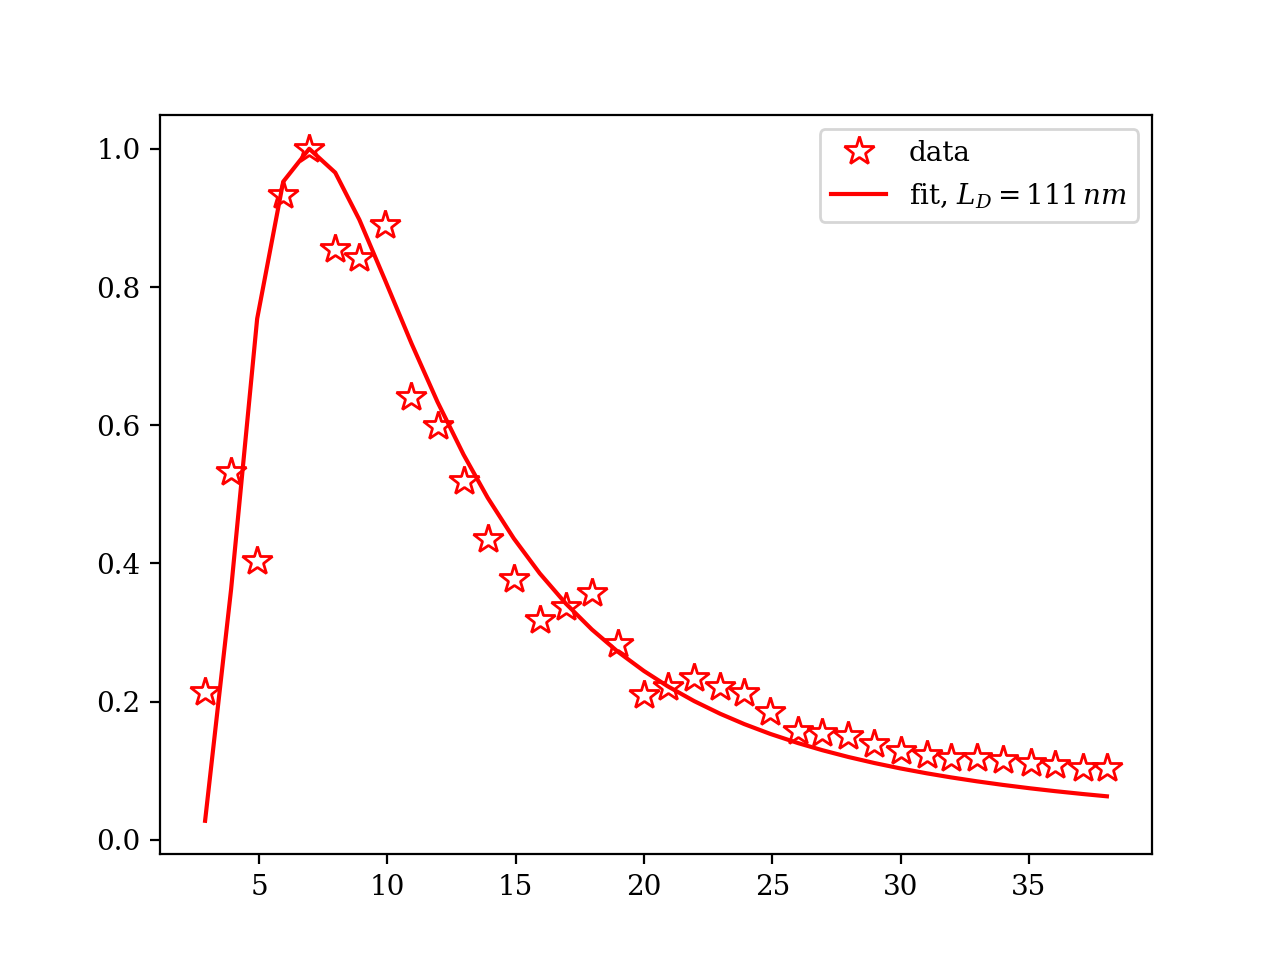

In [6]:
fig = plt.figure()
plt.plot(E, I_data, 'r*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'r-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### S3 data fitting

In [7]:
path = 'data/S3.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 80, W = 500)
data.append([E, I_data, I_fit, params, path])

Metal thickness : 176.73 ± 11.1 nm
 SCR width : 2.440 ± 8.939 mkm
 Diffusion length : 508.29 ± 310.69 nm
 Eta:1.000


<IPython.core.display.Javascript object>


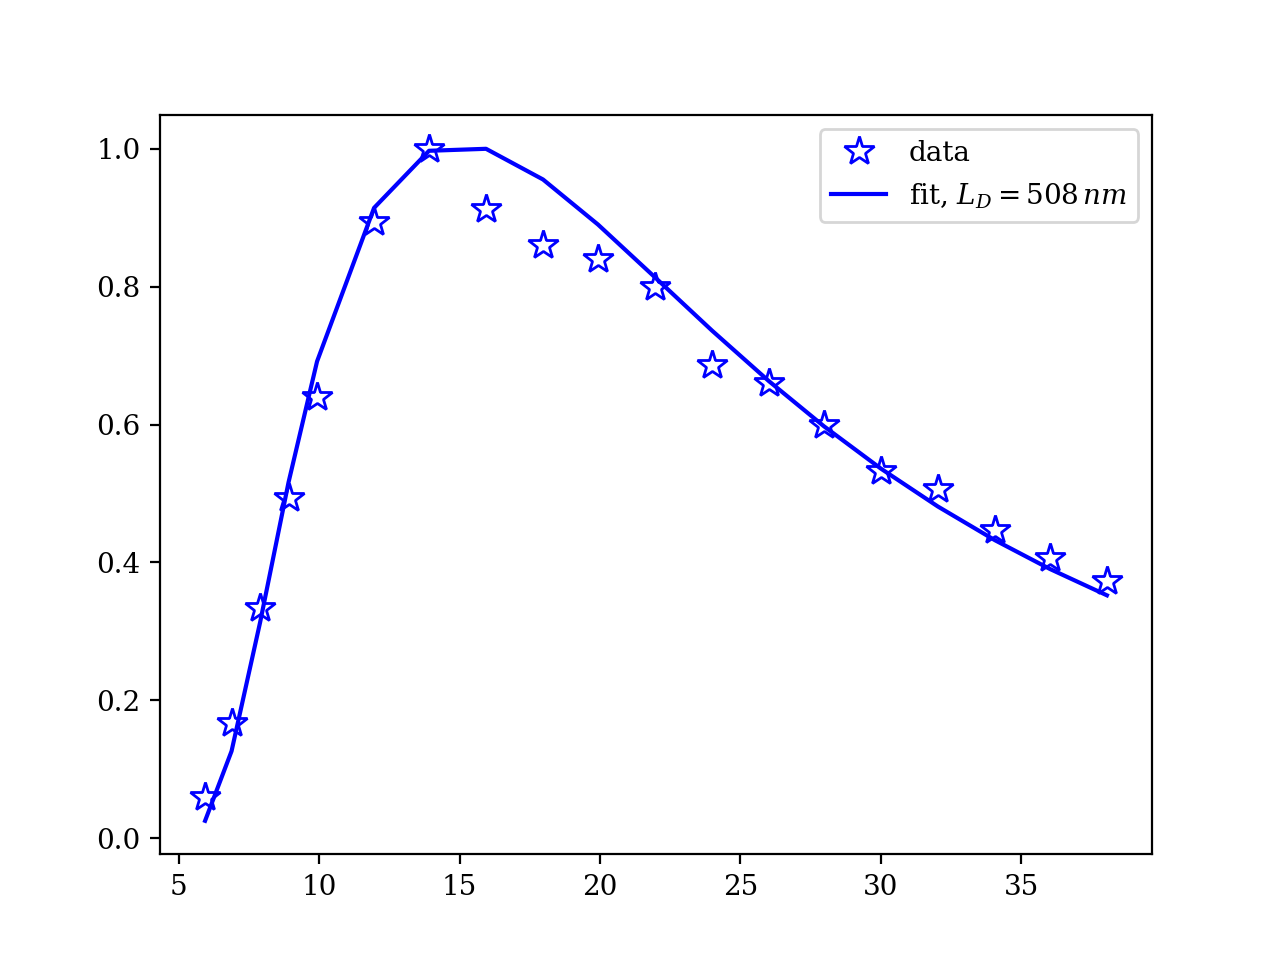

In [8]:
fig = plt.figure()
plt.plot(E, I_data, 'b*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'b-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### S2 data fitting

In [9]:
path = 'data/S2.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 40, W = 500)
data.append([E, I_data, I_fit, params, path])

Metal thickness : 28.89 ± 0.6 nm
 SCR width : 2.508 ± 1071725.933 mkm
 Diffusion length : 114.36 ± 4.56 nm
 Eta:1.000


<IPython.core.display.Javascript object>


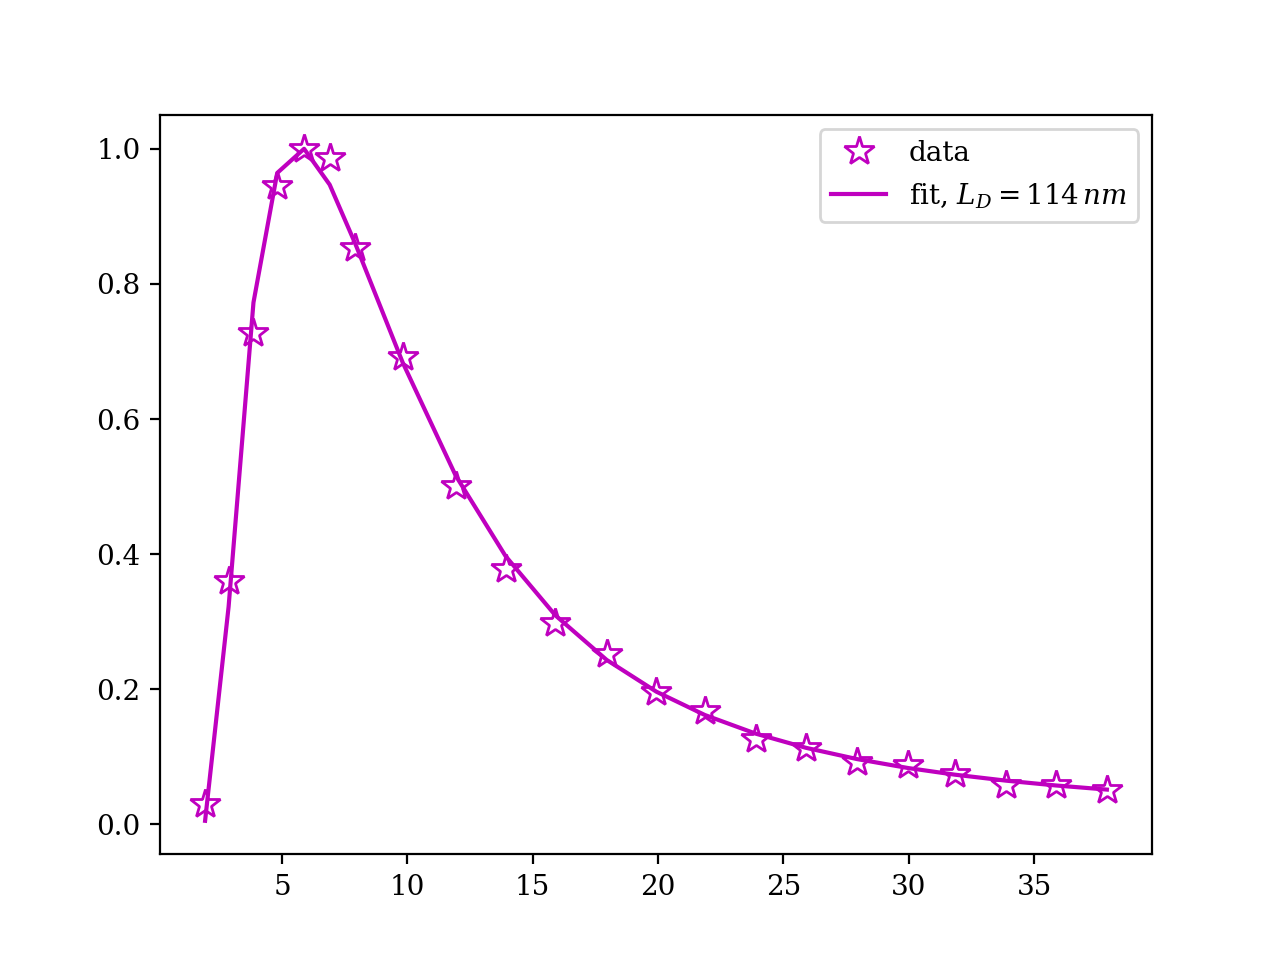

In [10]:
fig = plt.figure()
plt.plot(E, I_data, 'm*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'm-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### S4 data Fitting

In [11]:
path = 'data/S4.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 40, W = 500)
data.append([E, I_data, I_fit, params, path])

Metal thickness : 15.95 ± 3.1 nm
 SCR width : 1.111 ± 6.969 mkm
 Diffusion length : 318.08 ± 339.69 nm
 Eta:1.000


<IPython.core.display.Javascript object>


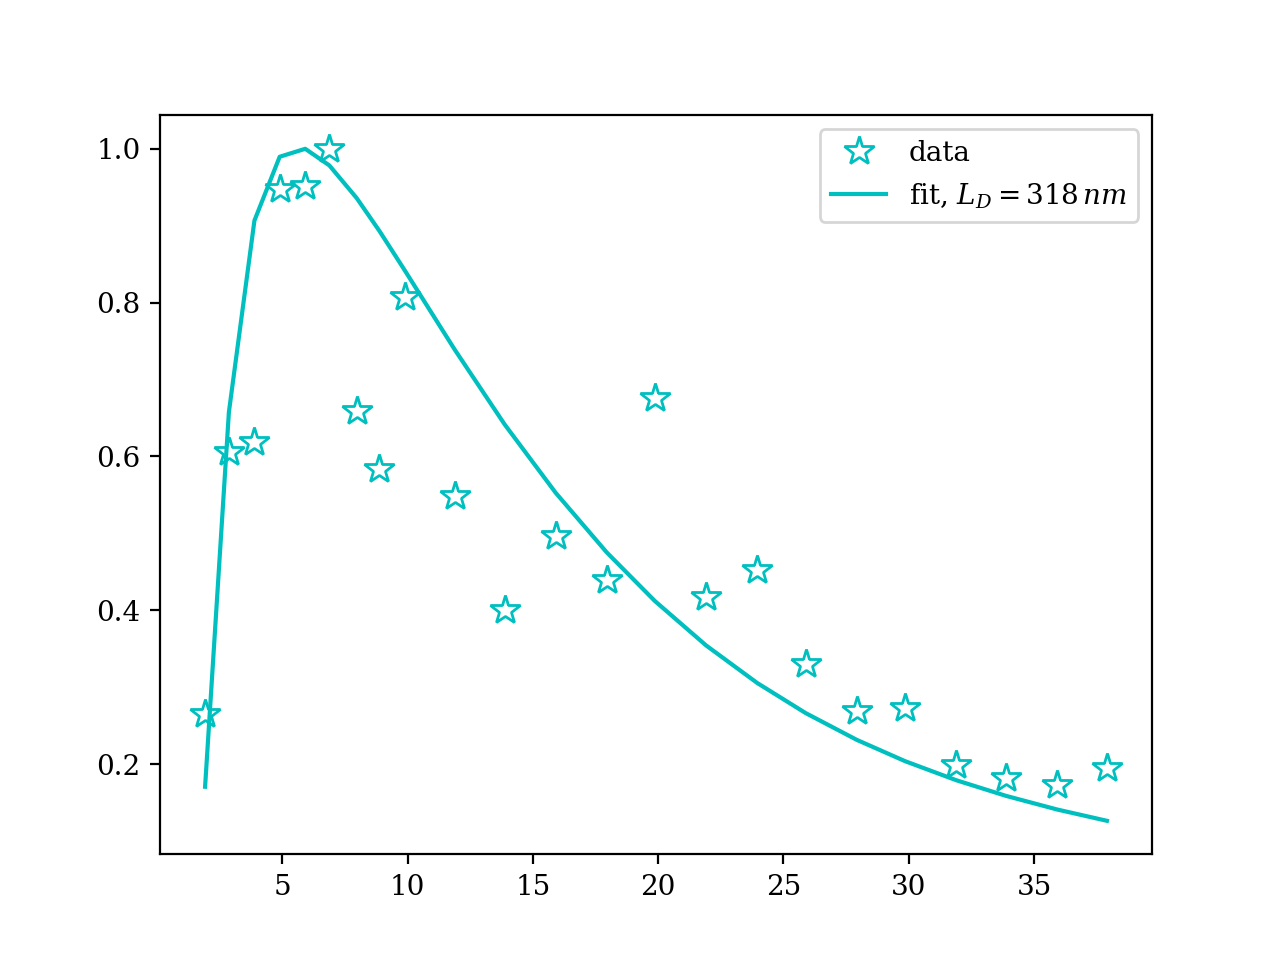

In [12]:
fig = plt.figure()
plt.plot(E, I_data, 'c*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'c-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### Alpha

In [13]:
path = 'data/alpha.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 40, W = 500)
data.append([E, I_data, I_fit, params, path])

Metal thickness : 39.99 ± 2.3 nm
 SCR width : 0.500 ± 0.494 mkm
 Diffusion length : 140.07 ± 24.77 nm
 Eta:1.000


<IPython.core.display.Javascript object>


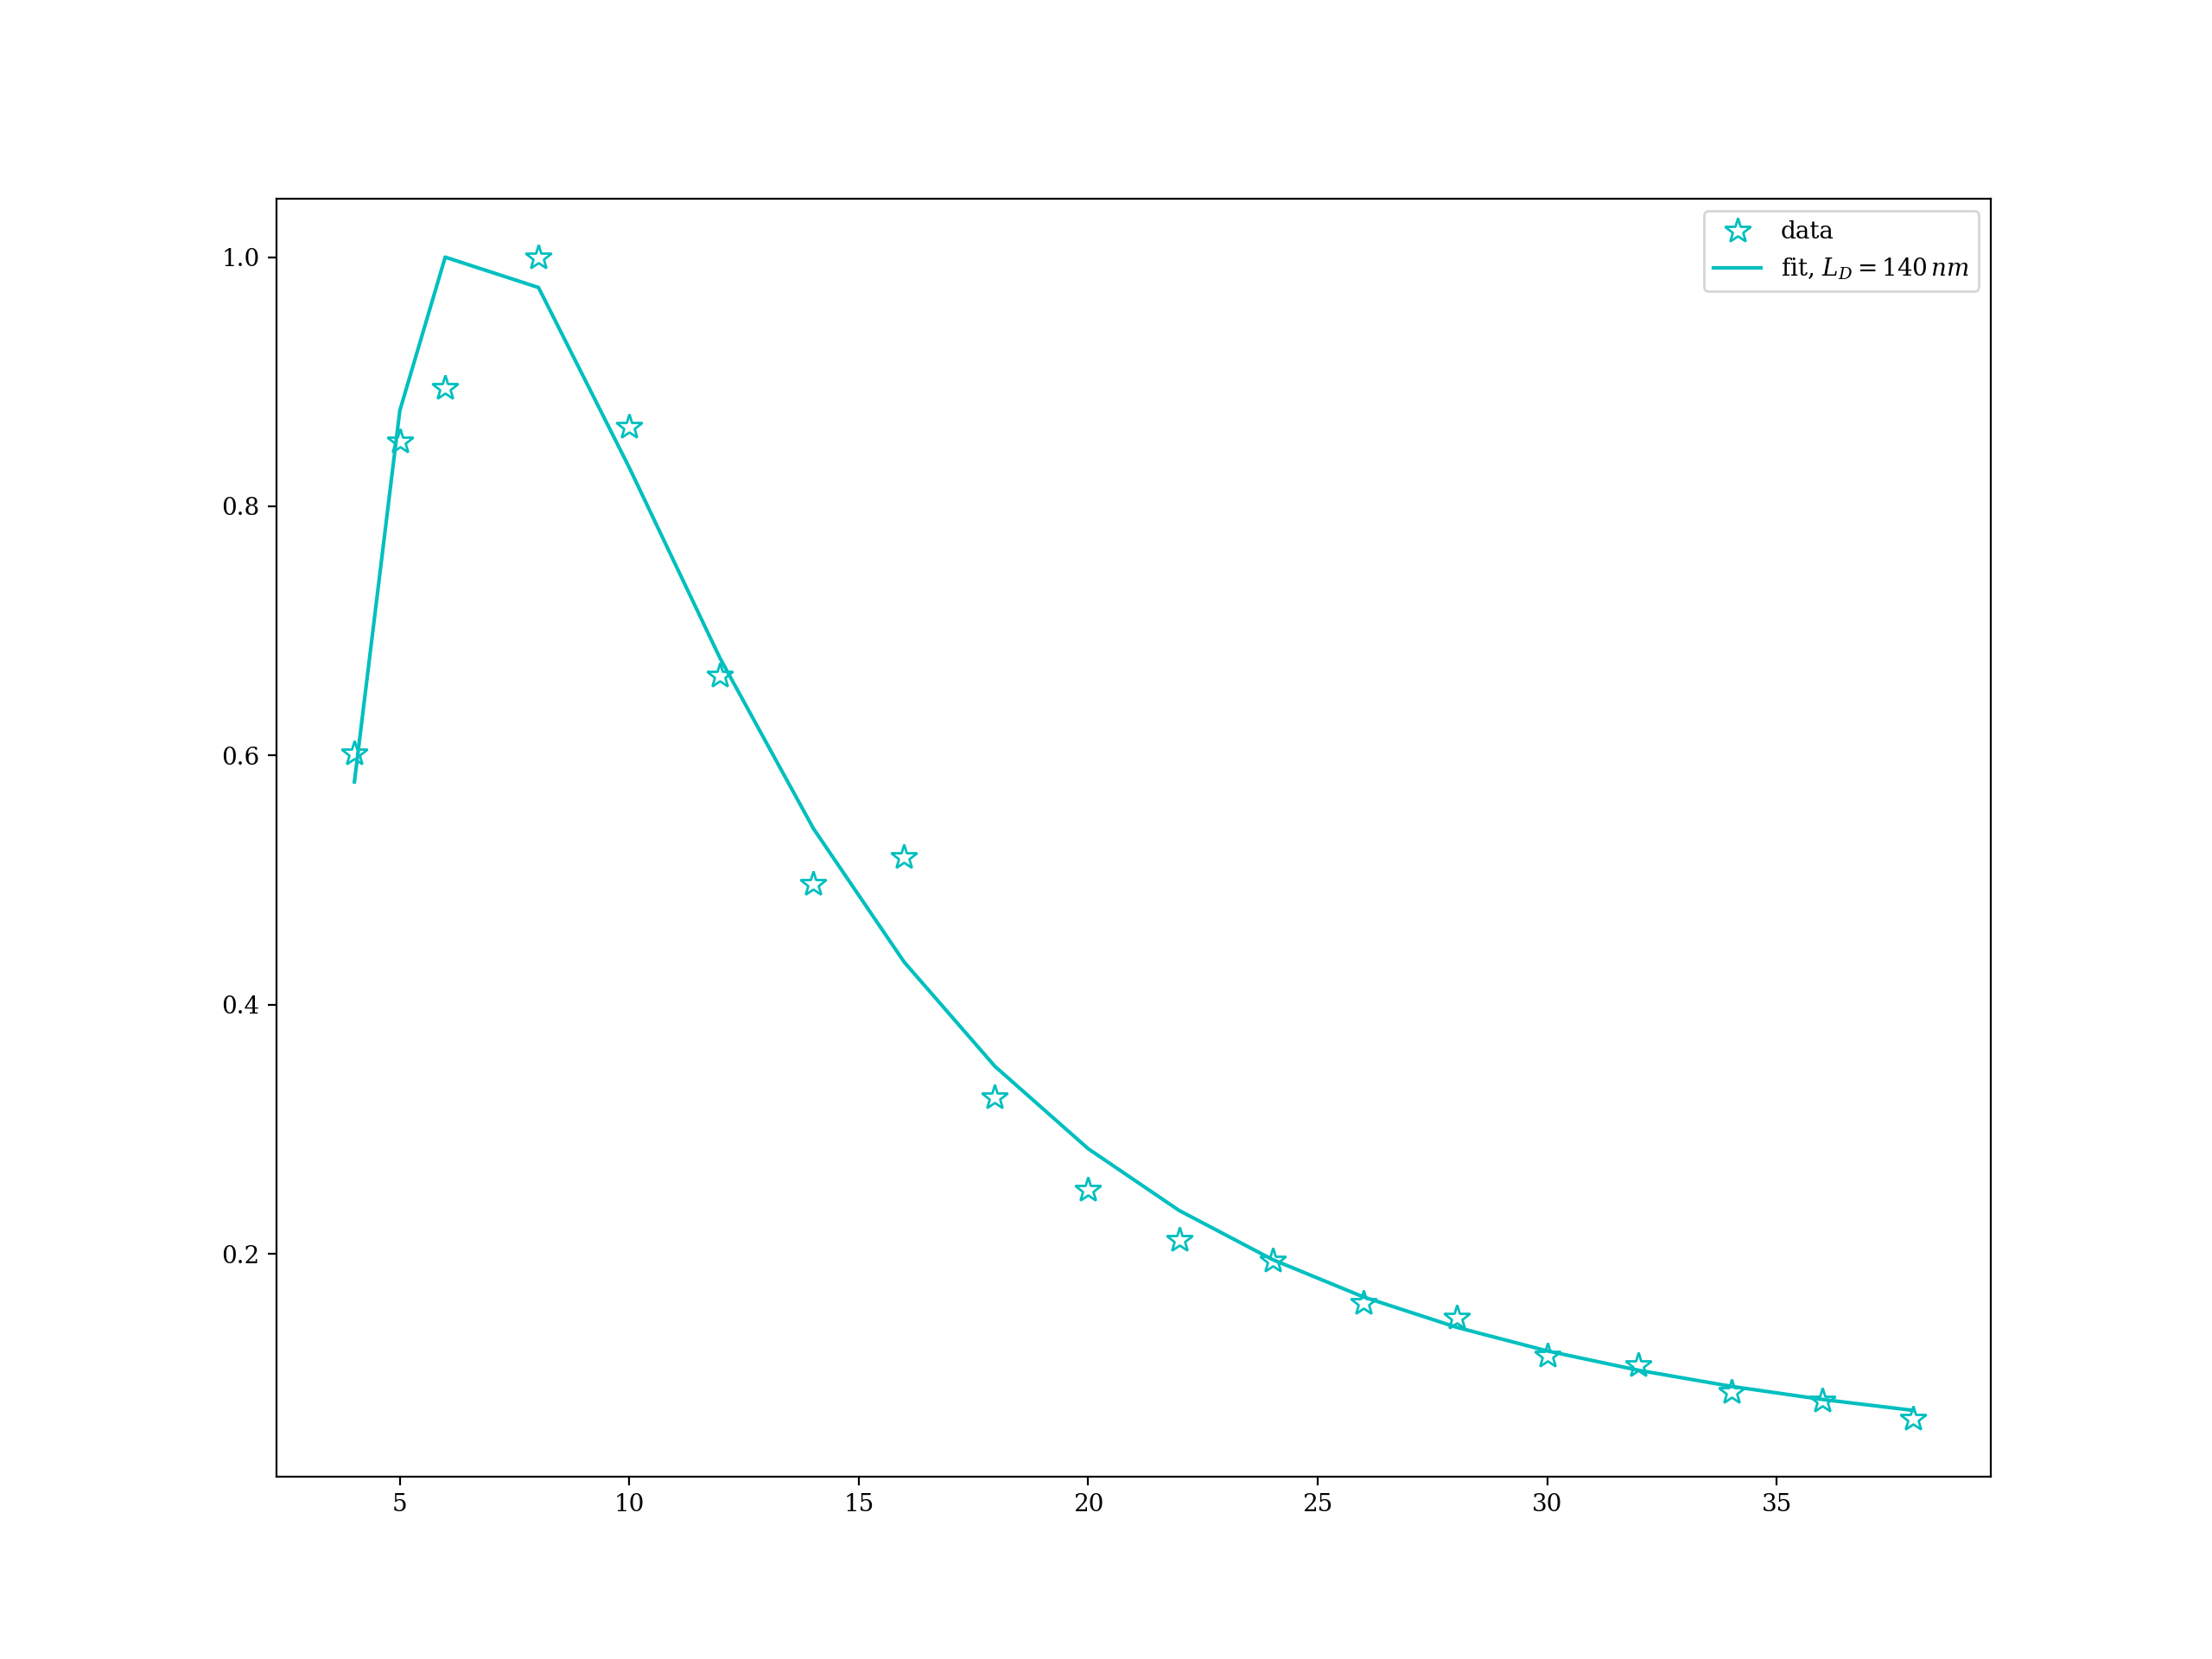

In [14]:
fig = plt.figure()
plt.plot(E, I_data, 'c*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'c-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### Total

<IPython.core.display.Javascript object>


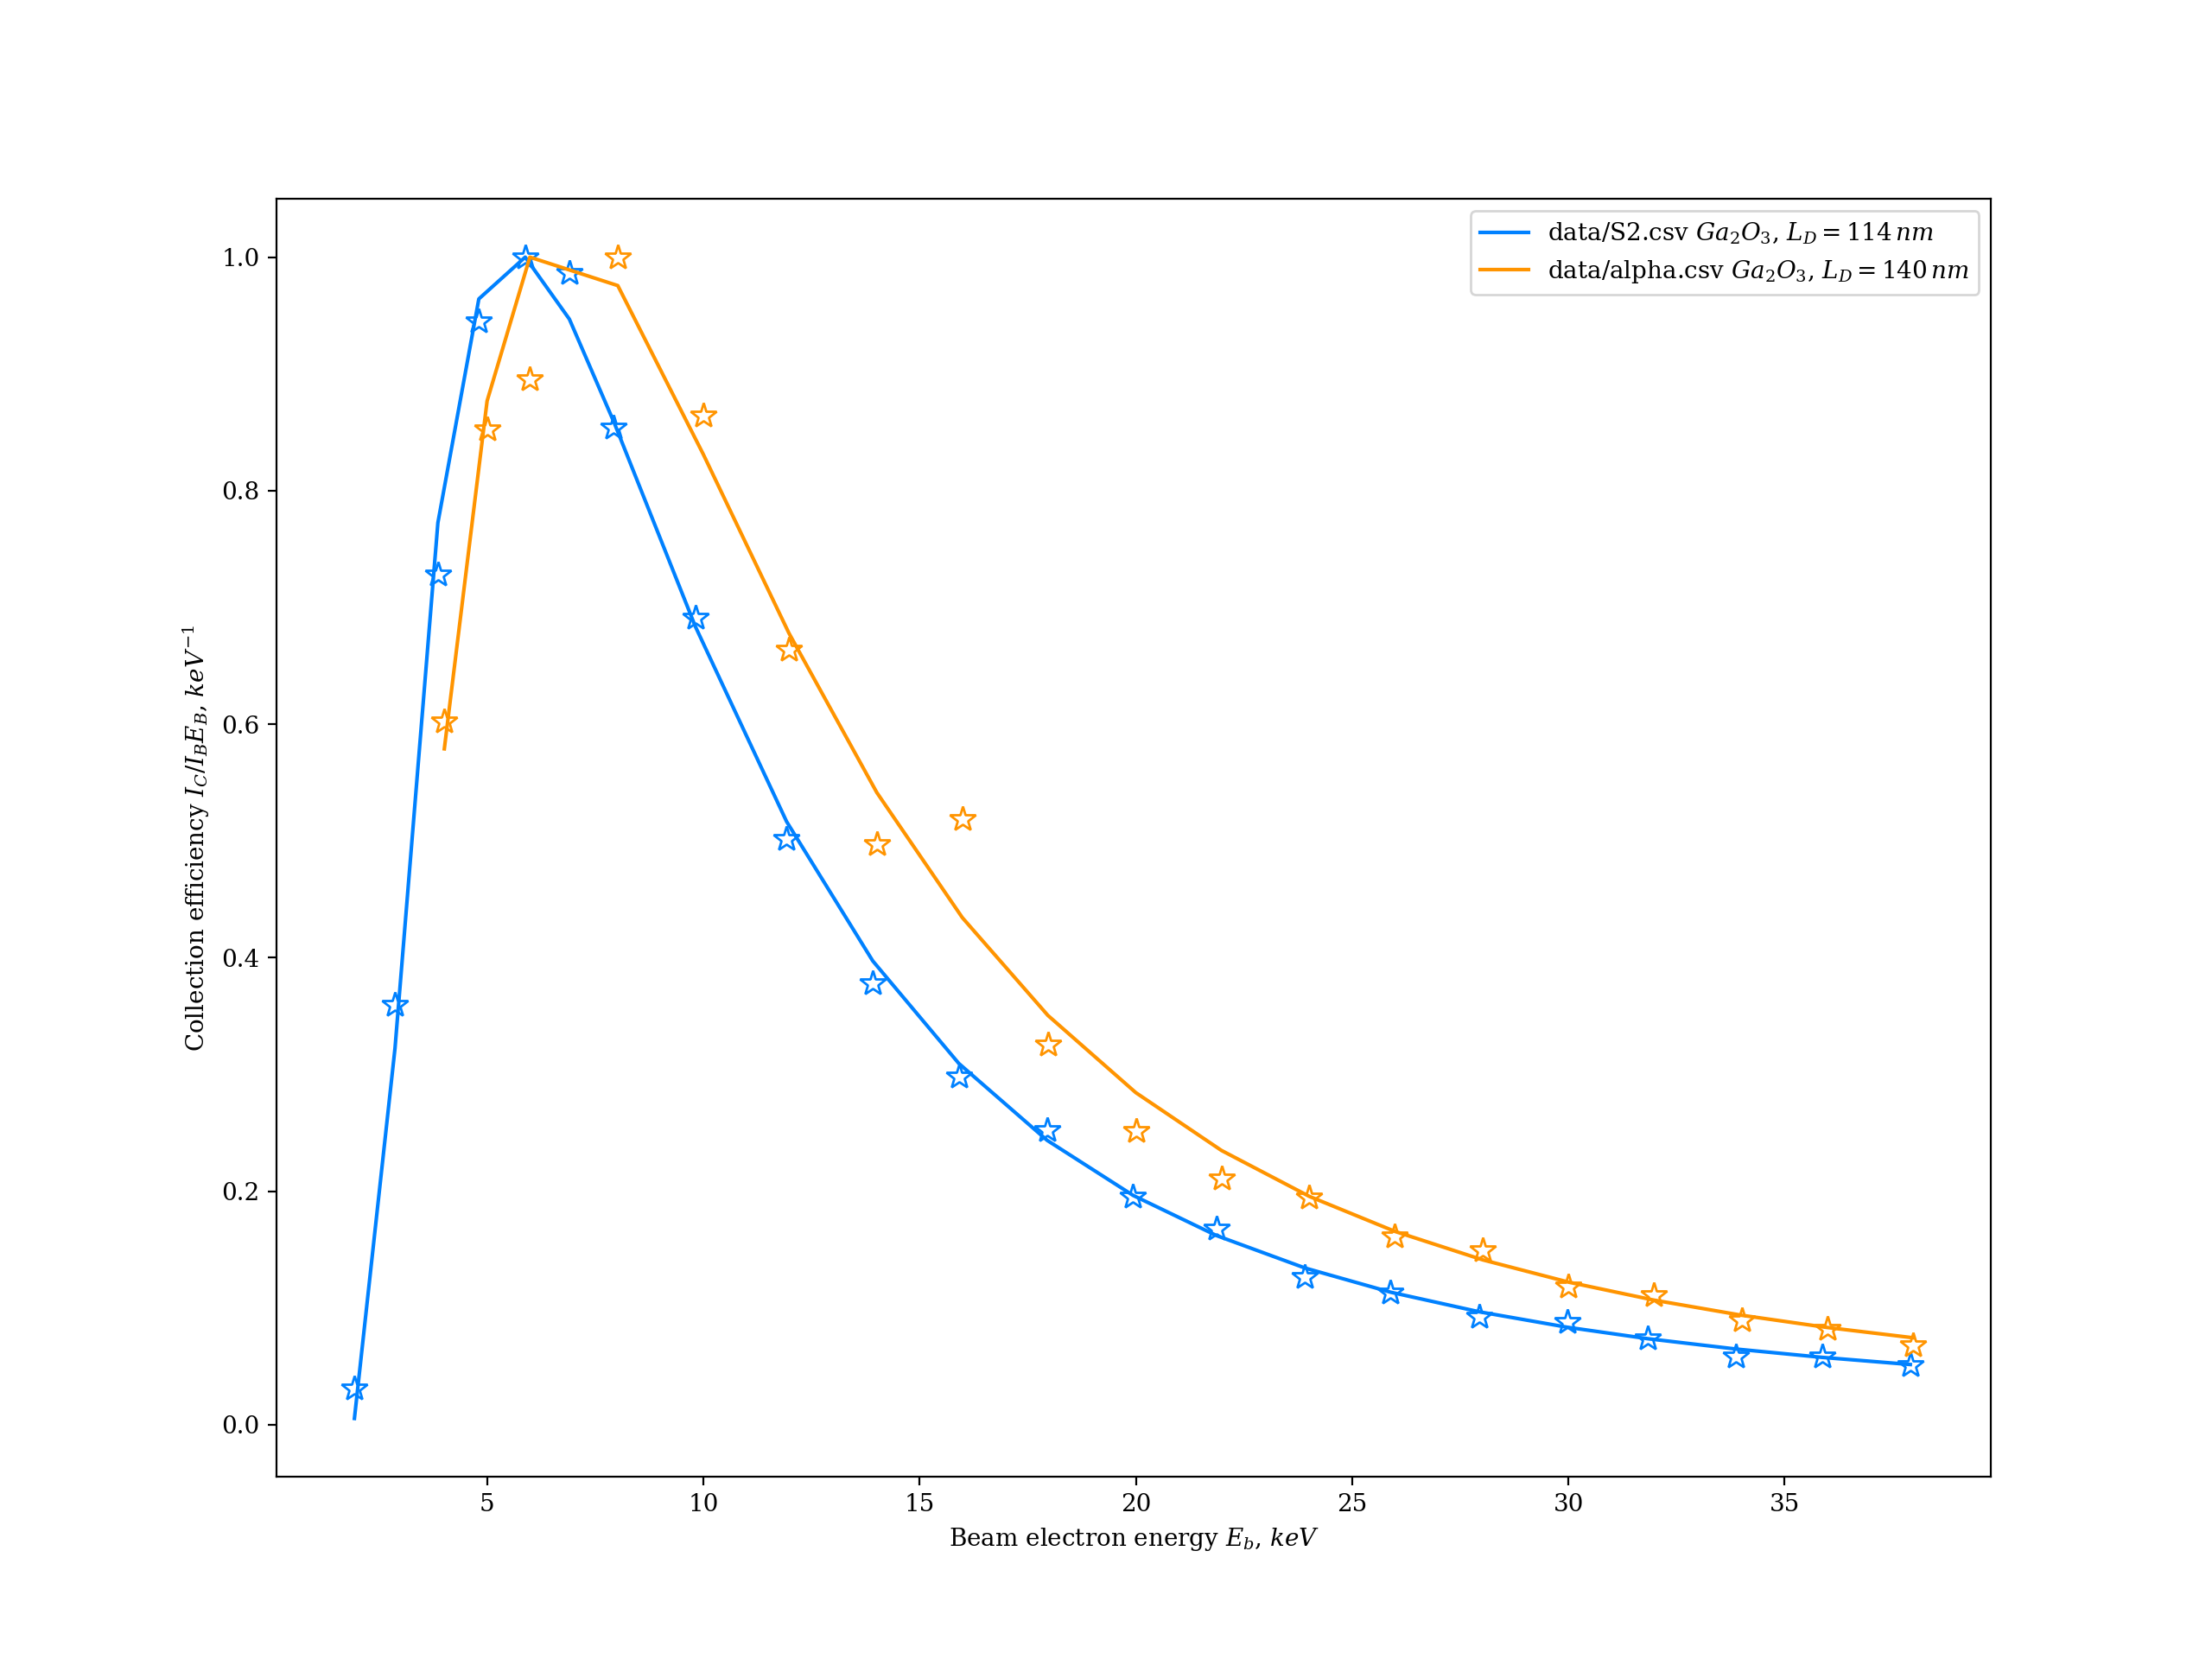

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel(r'Beam electron energy $E_b$, $keV$')
ax.set_ylabel(r'Collection efficiency $I_C / I_B E_B$, ${keV}^{-1}$')
c  = cm.jet(np.linspace(0, 1, len(data)))
p = [2, 4]
for i in p:
    E, I_data, I_fit, params, path = data[i]
    ax.plot(E, I_data, '*', c = c[i-1], ms = 11, mfc='none')
    ax.plot(E, I_fit,  '-', c = c[i-1], label = path + r' $Ga_2 O_3$' + r', $L_D = %.0f \,nm$'%params[2])
ax.legend()
#plt.savefig('diff_length.svg')